In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics')

from Position_data.Tracking_Data import tracking_data
from EPV_Basics import get_EPV_grid
from epv_utils import is_between
import Basics.Data.Metrica_IO as mio
import numpy as np
import pandas as pd
import torch
from Position_data.PitchControl import pitch_control as pc
import matplotlib.pyplot as plt

In [2]:
data_dir = 'sample-data-master/data'
game_id = 2
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch')
td_object

Reading team: away
Reading team: home


In [3]:
epv = get_EPV_grid(fname='xT_grid.csv', origin='Karun Singh (@karun1710)', td_object=td_object)
print(epv)
epv.grid

EPV grid from Karun Singh (@karun1710) of (12, 16) dimensions


array([[0.003, 0.004, 0.003, 0.004, 0.004, 0.005, 0.007, 0.008, 0.01 ,
        0.013, 0.018, 0.025, 0.037, 0.048, 0.06 , 0.066],
       [0.003, 0.005, 0.004, 0.004, 0.004, 0.005, 0.007, 0.008, 0.011,
        0.015, 0.02 , 0.029, 0.042, 0.056, 0.075, 0.092],
       [0.003, 0.003, 0.003, 0.004, 0.004, 0.006, 0.007, 0.009, 0.012,
        0.016, 0.022, 0.034, 0.046, 0.067, 0.094, 0.103],
       [0.004, 0.004, 0.004, 0.004, 0.004, 0.006, 0.007, 0.009, 0.012,
        0.016, 0.023, 0.034, 0.044, 0.068, 0.089, 0.123],
       [0.005, 0.005, 0.006, 0.004, 0.004, 0.006, 0.007, 0.01 , 0.013,
        0.017, 0.025, 0.033, 0.048, 0.068, 0.126, 0.158],
       [0.004, 0.005, 0.007, 0.004, 0.004, 0.006, 0.008, 0.009, 0.013,
        0.017, 0.025, 0.033, 0.052, 0.089, 0.171, 0.413],
       [0.004, 0.005, 0.007, 0.005, 0.005, 0.005, 0.008, 0.01 , 0.012,
        0.019, 0.025, 0.035, 0.042, 0.116, 0.176, 0.371],
       [0.005, 0.006, 0.007, 0.005, 0.005, 0.006, 0.008, 0.009, 0.014,
        0.018, 0.024, 0.03

(<Figure size 640x480 with 1 Axes>, <Axes: >)

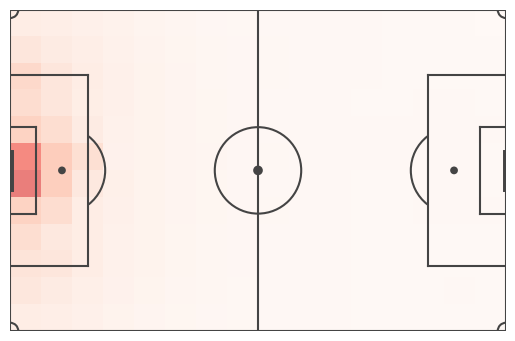

In [4]:
epv.plot_grid()

In [5]:
epv = get_EPV_grid(fname='FoTD_grid.csv', origin='Friends of Tracking [Laurie Shaw]', td_object=td_object)
print(epv)
epv.grid

EPV grid from Friends of Tracking [Laurie Shaw] of (32, 50) dimensions


array([[0.0046, 0.0046, 0.0045, ..., 0.0388, 0.0424, 0.0443],
       [0.0044, 0.0044, 0.0045, ..., 0.0388, 0.0421, 0.0437],
       [0.0041, 0.0042, 0.0044, ..., 0.0388, 0.0413, 0.0425],
       ...,
       [0.0041, 0.0042, 0.0044, ..., 0.0388, 0.0413, 0.0425],
       [0.0044, 0.0044, 0.0045, ..., 0.0388, 0.0421, 0.0437],
       [0.0046, 0.0046, 0.0045, ..., 0.0388, 0.0424, 0.0443]])

In [6]:
print(epv.grid_dimensions, '\n', epv.x_range_grid, '\n ',  epv.y_range_grid)
print(105/50)
print(68/32)

(32, 50) 
 (0, 105) 
  (0, 68)
2.1
2.125


In [7]:
print(epv.get_EPV_at_location(location=(2, 34)))
epv.get_EPV_at_location(location=(105, 68))

((15.9999, 0.9522809523809525), 0.5714)


((31.9999, 49.9999), 0.0046)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

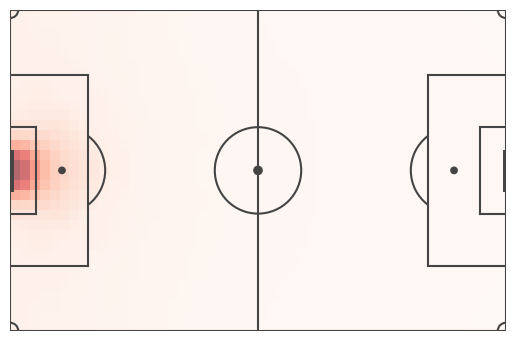

In [8]:
epv.plot_grid()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

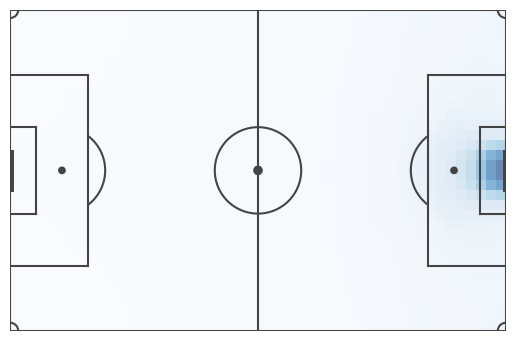

In [9]:
epv = get_EPV_grid(fname='FoTD_grid.csv', origin='Friends of Tracking [Laurie Shaw]', td_object=td_object, team = 'Away')
epv.plot_grid()

Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

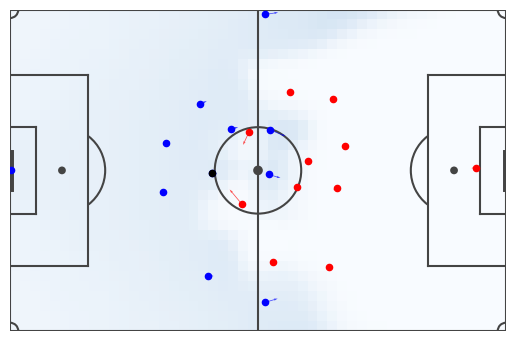

In [10]:
epv.plot_AV_grid(frame=100, risk=False)

Modelling pitch control...
Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

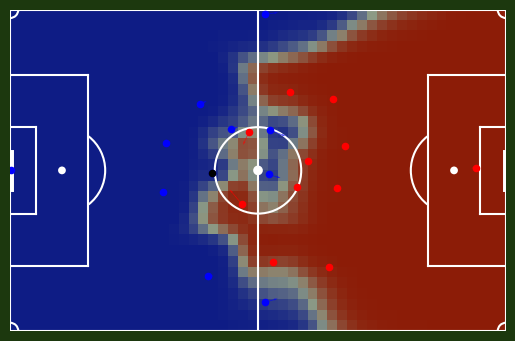

In [11]:
pc.plot_tensor_pitch_control(td_object=td_object, team='Away', frame=100, first_frame=0, last_frame=250)

Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

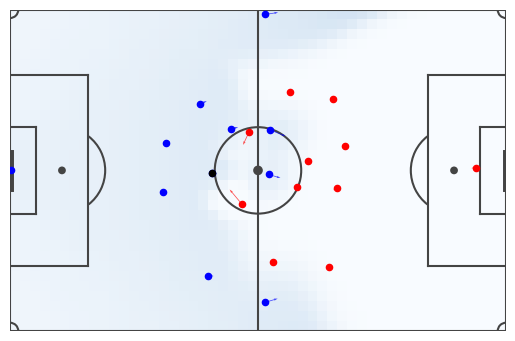

In [12]:
epv.plot_AV_grid(frame=100, pc_version='Fernandez', pc_implementation='adap', risk=False)

Modelling pitch control...
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

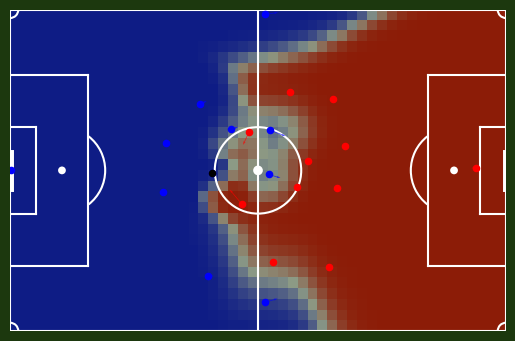

In [13]:
pc.plot_tensor_pitch_control(td_object=td_object, team='Away', frame=100, first_frame=0, last_frame=250,
                            version='Fernandez', implementation='adap')

In [14]:
pitch_control_grid = pc.tensor_pitch_control(td_object=td_object, team='Away', first_frame=0, last_frame=250,
                            version='Fernandez', implementation='adap')[100].reshape(30,50)

Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

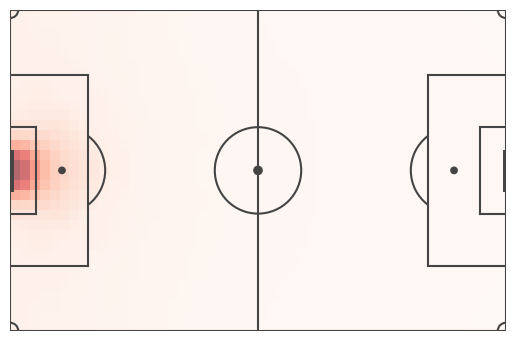

In [15]:
epv = get_EPV_grid(fname='FoTD_grid.csv', origin='Friends of Tracking [Laurie Shaw]', td_object=td_object, team = 'Home')
epv.plot_grid()

Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

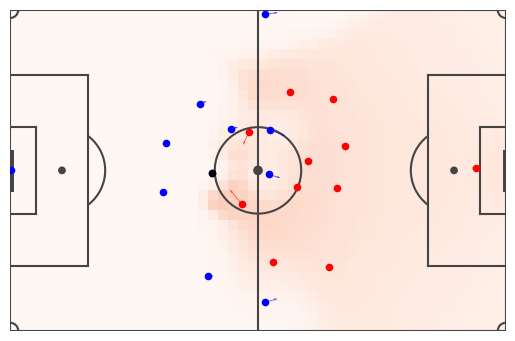

In [16]:
epv.plot_AV_grid(frame=100, pc_version='Fernandez', pc_implementation='adap', risk=False)

Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

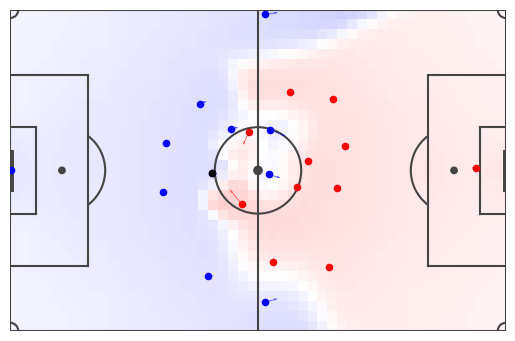

In [17]:
epv.plot_AV_grid(frame=100, pc_version='Fernandez', pc_implementation='adap', risk=True)

Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

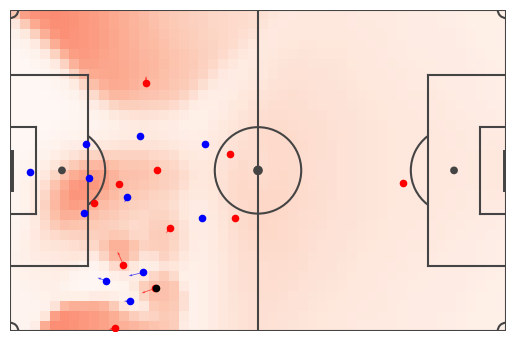

In [18]:
epv.plot_AV_grid(frame=4000, pc_version='Fernandez', pc_implementation='adap', risk=False, pc_first_frame_calc=4000,
                pc_last_frame_calc=4250)

Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

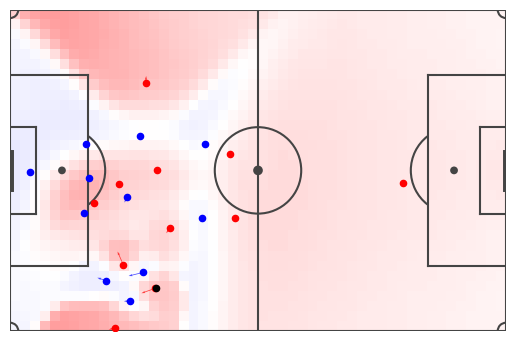

In [19]:
epv.plot_AV_grid(frame=4000, pc_version='Fernandez', pc_implementation='adap', risk=True, pc_first_frame_calc=4000,
                pc_last_frame_calc=4250)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

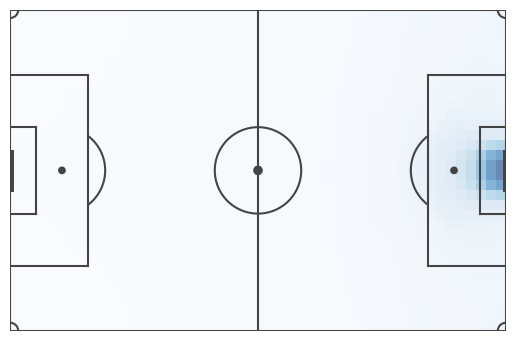

In [20]:
epv = get_EPV_grid(fname='FoTD_grid.csv', origin='Friends of Tracking [Laurie Shaw]', td_object=td_object, team = 'Away')
epv.plot_grid()

Modelling pitch control...
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

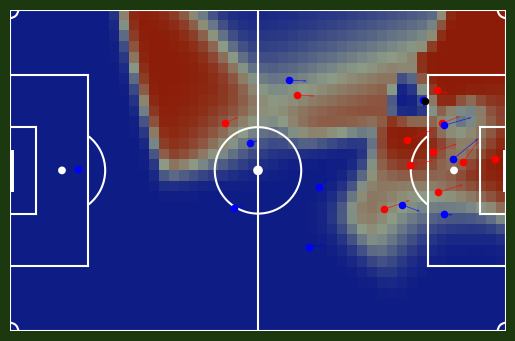

In [21]:
pc.plot_tensor_pitch_control(td_object=td_object, team='Away', frame=90135, first_frame=90000, last_frame=90250,
                            version='Fernandez', implementation='adap')

Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

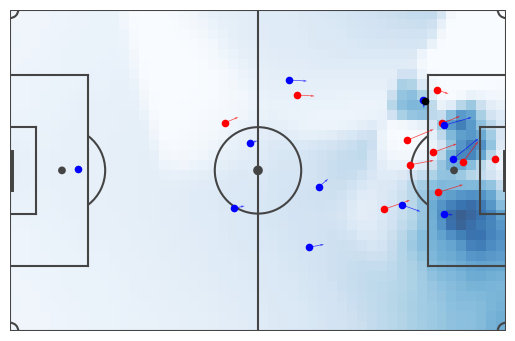

In [22]:
epv.plot_AV_grid(frame=90135, pc_version='Fernandez', pc_implementation='adap', risk=False, pc_first_frame_calc=90000,
                pc_last_frame_calc=90250)

bwr_r
Current batch: 1/1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(<Figure size 640x480 with 1 Axes>, <Axes: >)

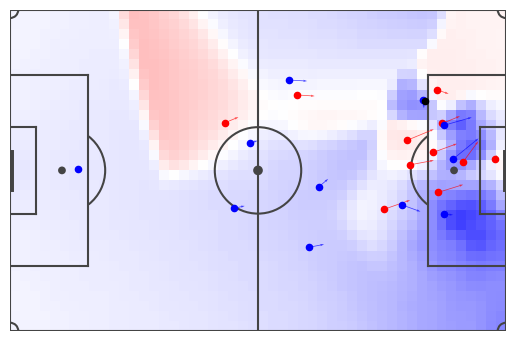

In [23]:
epv.plot_AV_grid(frame=90135, pc_version='Fernandez', pc_implementation='adap', risk=True, pc_first_frame_calc=90000,
                pc_last_frame_calc=90250)

In [26]:
pc.animate_tensor_pitch_control(td_object=td_object, first_frame_ani=90000, last_frame_ani=90250, first_frame_calc=90000,
                               last_frame_calc=90250, version='Fernandez', implementation='adap', fname='Fernandez_PC_adap_90000_250')

Current batch: 1/1
Generating your clip...
25.0% done!
50.0% done!
75.0% done!
All done!
